## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    x = input_layer
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
        x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
def plot_results(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
        plt.hlines(y=results[cond]['loss_loadback'], xmin=0, xmax=len(results[cond]['train-loss']), colors=color_bar[i], linestyles='--')
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
        plt.hlines(y=results[cond]['acc_loadback'], xmin=0, xmax=len(results[cond]['train-acc']), colors=color_bar[i], linestyles='--')
    plt.title("Accuracy")
    plt.legend()
    plt.show()

Experiment with save_best_only=True
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________________________________

Epoch 46/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.5234 - acc: 0.8514 - val_loss: 1.6427 - val_acc: 0.4924
Epoch 47/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5056 - acc: 0.8592 - val_loss: 1.6602 - val_acc: 0.4966
Epoch 48/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.4892 - acc: 0.8643 - val_loss: 1.6887 - val_acc: 0.4900
Epoch 49/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.4732 - acc: 0.8706 - val_loss: 1.6864 - val_acc: 0.4931
Epoch 50/50
10000/10000 [==============================] - 1s 89us/step
Experiment with save_best_only=False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________

50000/50000 [==============================] - 2s 48us/step - loss: 0.6010 - acc: 0.8182 - val_loss: 1.5825 - val_acc: 0.4903
Epoch 45/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.5835 - acc: 0.8249 - val_loss: 1.6017 - val_acc: 0.4859
Epoch 46/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.5660 - acc: 0.8335 - val_loss: 1.6074 - val_acc: 0.4906
Epoch 47/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.5502 - acc: 0.8389 - val_loss: 1.6299 - val_acc: 0.4849
Epoch 48/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.5333 - acc: 0.8449 - val_loss: 1.6218 - val_acc: 0.4898
Epoch 49/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.5153 - acc: 0.8531 - val_loss: 1.6468 - val_acc: 0.4865
Epoch 50/50
10000/10000 [==============================] - 1s 88us/step


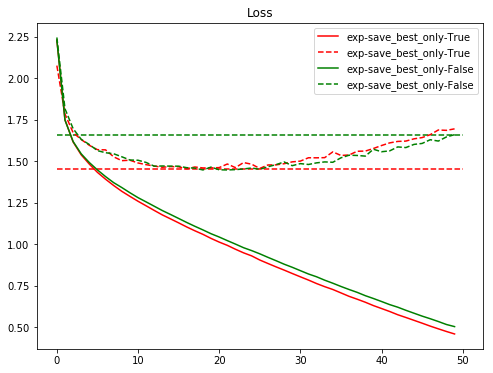

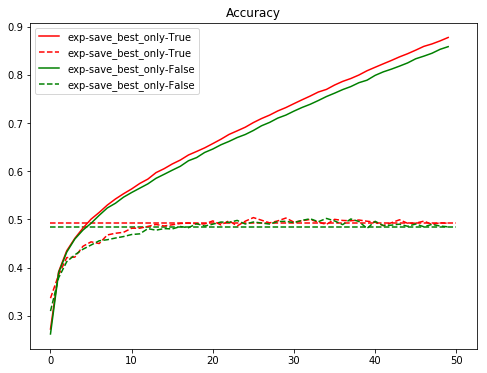

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for save_best_only in [True, False]:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with save_best_only=%s" % str(save_best_only))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                                 monitor="val_loss", 
                                 save_best_only=save_best_only)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              callbacks=[model_ckpt],
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    # Load back
    model_loadback = keras.models.load_model("./tmp.h5")
    loss_loadback, acc_loadback = model_loadback.evaluate(x_test, y_test)

    exp_name_tag = "exp-save_best_only-%s" % str(save_best_only)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc,
                             'loss_loadback': loss_loadback,
                             'acc_loadback': acc_loadback
                            }
plot_results(results)

Experiment with save_weights_only=True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 1

50000/50000 [==============================] - 2s 48us/step - loss: 0.5056 - acc: 0.8587 - val_loss: 1.7002 - val_acc: 0.4826
Epoch 50/50
10000/10000 [==============================] - 1s 87us/step


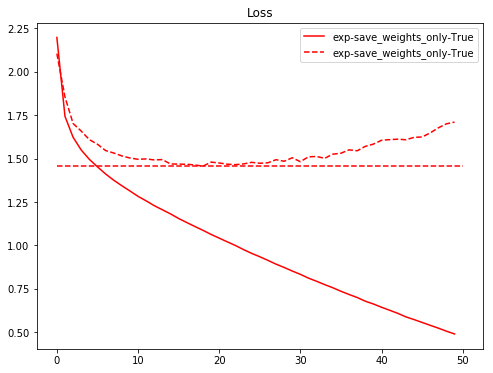

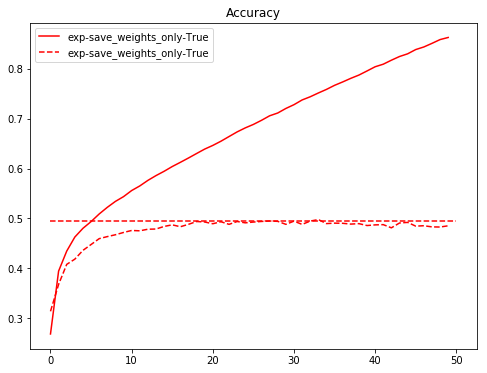

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for save_weights_only in [True]:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with save_weights_only=%s" % str(save_weights_only))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model_ckpt = ModelCheckpoint(filepath="./tmp_weights.h5", 
                                 monitor="val_loss", 
                                 save_best_only=True,
                                 save_weights_only=save_weights_only
                                )
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              callbacks=[model_ckpt],
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    # Load back
    model_loadback = build_mlp(input_shape=x_train.shape[1:])
    model_loadback.load_weights("./tmp_weights.h5")
    model_loadback.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    loss_loadback, acc_loadback = model_loadback.evaluate(x_test, y_test)

    exp_name_tag = "exp-save_weights_only-%s" % str(save_weights_only)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc,
                             'loss_loadback': loss_loadback,
                             'acc_loadback': acc_loadback
                            }
plot_results(results)